# **Coffee Shop Sales Analysis Report**

## **Business Understanding**


Bisnis ini mengoperasikan jaringan kedai kopi dengan saluran penjualan melalui toko fisik (berlokasi di beberapa wilayah NYC: Lower Manhattan, Hell’s Kitchen, dan Astoria) serta kanal penjualan online. Penawaran utama meliputi:
- Minuman kopi (berbasis espresso, organik, premium)
- Teh (blends spesial, chai, dll.)
- Cokelat minum
- Produk roti & kue (baked goods)
- Produk ritel (biji kopi, sirup, cokelat kemasan)

Kategori kopi menjadi penyumbang pendapatan utama, dengan penjualan sekitar **Rp270K** hanya dalam enam bulan — jauh melampaui kategori lainnya.

> Memahami produk dan waktu pembelian yang mendorong penjualan sangat penting untuk:

- Perencanaan inventaris
- Penargetan promosi
- Desain menu
- Personalisasi pemasaran


## **Problem Statement**

Analisis ini bertujuan untuk mengidentifikasi faktor-faktor yang mendorong penjualan dan preferensi pelanggan guna mendukung pengambilan keputusan bisnis dan meningkatkan pendapatan.

Pertanyaan yang ingin dijawab:

- Kategori atau lini produk mana yang menjadi top performer atau berkinerja buruk?

- Bagaimana pola variasi penjualan berdasarkan waktu (per bulan, hari, dan jam)?

- Toko atau kanal penjualan mana yang menghasilkan pendapatan tertinggi?

- Produk apa saja yang paling laris dan produk mana yang kurang diminati?

Insight dari analisis ini akan digunakan untuk merumuskan strategi produk, pemasaran, dan operasional bisnis.


## **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

pd.set_option('display.float.format', '{:.2f}'.format)

In [2]:
df = pd.read_excel('Coffee Shop Sales.xlsx')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


## **Data Understanding**

Dataset ini berisi data transaksi penjualan dari sebuah jaringan kedai kopi selama periode Januari hingga Juni 2023. Terdapat total **149,116 baris** dan **11 kolom**. Penjelasan masing-masing kolom sebagai berikut:

| Nama Kolom            | Tipe Data       | Deskripsi                                                                 |
|------------------------|----------------|---------------------------------------------------------------------------|
| `transaction_id`       | Integer         | ID unik untuk setiap transaksi.                                           |
| `transaction_date`     | Date            | Tanggal transaksi dilakukan (format: YYYY-MM-DD).                         |
| `transaction_time`     | Time            | Waktu transaksi dilakukan (format: HH:MM:SS).                             |
| `transaction_qty`      | Integer         | Jumlah unit produk yang dibeli dalam satu transaksi.                      |
| `store_id`             | Integer         | ID toko tempat transaksi dilakukan.                                       |
| `store_location`       | String          | Lokasi toko tempat transaksi terjadi (misalnya: Hell's Kitchen, Astoria).|
| `product_id`           | Integer         | ID unik untuk setiap produk yang dijual.                                  |
| `unit_price`           | Float           | Harga per unit produk (dalam dolar).                                      |
| `product_category`     | String          | Kategori umum produk (misalnya: Coffee, Tea, Bakery).                     |
| `product_type`         | String          | Jenis produk berdasarkan penyajian atau gaya (misalnya: Latte, Chai).     |
| `product_detail`       | String          | Detail spesifik produk (misalnya: Ethiopia Rg, Peppermint Lg).            |

---

**Catatan:**
- Kombinasi kolom `transaction_date`, `transaction_time`, dan `store_location` bisa digunakan untuk analisis pola waktu dan lokasi pembelian.
- Kolom `unit_price * transaction_qty` dapat digunakan untuk menghitung total nilai transaksi.
- Kategori produk dan jenis produk berguna untuk segmentasi produk terlaris atau yang kurang laku.


In [3]:
# Buat dataframe ringkasan informasi
info_df = pd.DataFrame({
    'Nama Kolom': df.columns,
    'Tipe Data': df.dtypes.values,
    'Jumlah Unik': [df[col].nunique() for col in df.columns],
    'Missing Values': df.isnull().sum().values,
    'Duplicate Values': df.duplicated().sum(),
    'Contoh Nilai': [df[col].dropna().unique()[:3] for col in df.columns]
})

# Tampilkan tabel informasi
info_df


,Nama Kolom,Tipe Data,Jumlah Unik,Missing Values,Duplicate Values,Contoh Nilai
0,transaction_id,int64,149116,0,0,"[1, 2, 3]"
1,transaction_date,datetime64[ns],181,0,0,"[2023-01-01 00:00:00, 2023-01-02 00:00:00, 202..."
2,transaction_time,object,25762,0,0,"[07:06:11, 07:08:56, 07:14:04]"
3,transaction_qty,int64,6,0,0,"[2, 1, 3]"
4,store_id,int64,3,0,0,"[5, 8, 3]"
5,store_location,object,3,0,0,"[Lower Manhattan, Hell's Kitchen, Astoria]"
6,product_id,int64,80,0,0,"[32, 57, 59]"
7,unit_price,float64,41,0,0,"[3.0, 3.1, 4.5]"
8,product_category,object,9,0,0,"[Coffee, Tea, Drinking Chocolate]"
9,product_type,object,29,0,0,"[Gourmet brewed coffee, Brewed Chai tea, Hot c..."


In [ ]:
df.to_excel('Coffee Shop Sales_clean.xlsx', index=False)

## **EXPLORATORY DATA ANALYST**

In [ ]:
df['sales'] = df['transaction_qty'] * df['unit_price']
# Add 'transaction_hour' safely from datetime.time column
df['transaction_hour'] = df['transaction_time'].apply(lambda x: x.hour)
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['month'] = df['transaction_date'].dt.to_period('M').astype(str)

### Total Penjualan Berdasarkan Hari

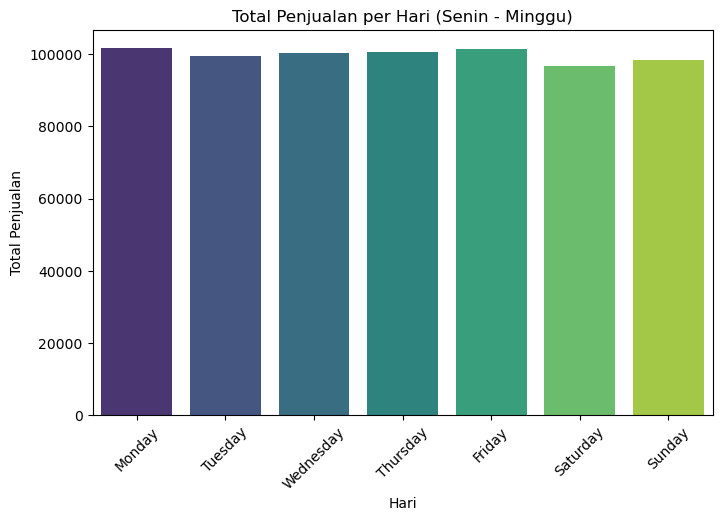

In [9]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = df.groupby('day_of_week')['sales'].sum().reindex(day_order).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=day_sales, x='day_of_week', y='sales', palette='viridis')
plt.title('Total Penjualan per Hari (Senin - Minggu)')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

### Total Penjualan per Hari (Senin - Minggu)

Visualisasi bar chart di atas menunjukkan total nilai penjualan (`sales`) untuk setiap hari dalam satu minggu, dari Senin hingga Minggu.

#### Interpretasi:

- Penjualan cukup **stabil sepanjang minggu**, dengan variasi yang relatif kecil antar hari.
- Hari kerja seperti **Senin hingga Jumat** menunjukkan tingkat penjualan yang **sedikit lebih tinggi** dibanding akhir pekan.
- **Hari Jumat** memiliki nilai penjualan tertinggi, meskipun perbedaannya tidak terlalu mencolok.
- **Sabtu dan Minggu** cenderung memiliki penjualan sedikit lebih rendah dibanding hari kerja.

#### Kesimpulan:

- Tidak ada hari yang benar-benar menonjol sebagai puncak penjualan secara signifikan.
- Aktivitas penjualan **terdistribusi merata sepanjang minggu**, dengan sedikit peningkatan di hari kerja.
- Ini menunjukkan bahwa **pelanggan berbelanja secara konsisten**, baik di hari kerja maupun akhir pekan.

>  Insight: Karena tidak ada hari yang dominan, strategi penjualan dapat diterapkan secara merata, atau difokuskan untuk meningkatkan daya tarik pada akhir pekan yang sedikit lebih rendah.

#### Rekomendasi:

- Manfaatkan data ini untuk merancang promo jangka pendek seperti **"Midweek Deals"** atau **"Weekend Flash Sale"**.
- Jaga konsistensi pelayanan dan stok produk sepanjang minggu karena tidak ada penurunan drastis di hari tertentu.


### Total Penjualan Berdasarkan Waktu Penjualan

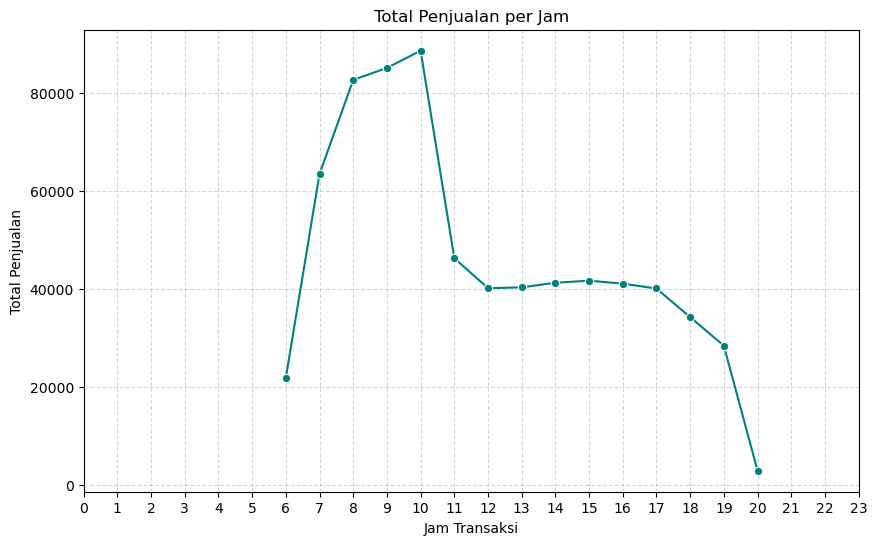

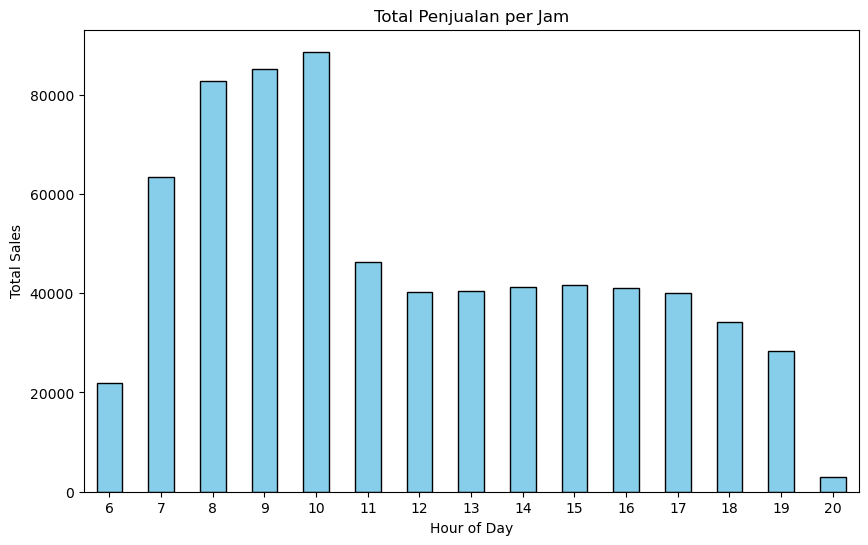

In [10]:
hourly_sales = df.groupby('transaction_hour')['sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_sales, x='transaction_hour', y='sales', marker='o', color='teal')
plt.title('Total Penjualan per Jam')
plt.xlabel('Jam Transaksi')
plt.ylabel('Total Penjualan')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Now you can group and plot hourly sales safely:
hourly_sales = df.groupby('transaction_hour')['sales'].sum()

hourly_sales.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Total Penjualan per Jam')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


### Total Penjualan per Jam (Hourly Sales)

Visualisasi line chart di atas menggambarkan total nilai penjualan (`sales`) yang terjadi pada masing-masing jam dalam sehari (0–23).

#### Interpretasi:

- **Puncak penjualan** terjadi pada pukul **09:00–10:00**, dengan nilai penjualan tertinggi di antara semua jam.
- Jam **08:00 dan 10:00** juga menunjukkan volume penjualan yang tinggi, membentuk tren **morning rush** (jam sibuk pagi).
- Setelah pukul **11:00**, total penjualan **turun drastis** dan cenderung stabil di kisaran yang lebih rendah sepanjang siang dan sore hari.
- Aktivitas penjualan kembali **menurun tajam setelah pukul 18:00**, dan sangat rendah setelah jam **20:00**.

#### Kesimpulan:

- Mayoritas penjualan terjadi antara **pukul 07:00 hingga 11:00**, menunjukkan bahwa pelanggan cenderung melakukan pembelian di pagi hari.
- Jam-jam selain itu memiliki performa yang jauh lebih rendah, mengindikasikan adanya **peluang peningkatan penjualan di luar jam sibuk**.

>  Insight: Pola ini cocok dengan bisnis kopi atau sarapan cepat, di mana pelanggan membeli saat akan memulai aktivitas harian.

#### Rekomendasi:

- Perkuat operasional di **jam sibuk pagi** (08:00–11:00) dengan staf tambahan, produk cepat saji, dan layanan cepat.
- Terapkan **promosi khusus sore/malam** (misalnya: "Happy Hour" setelah pukul 15:00) untuk menarik lebih banyak pelanggan di luar jam sibuk.


### Total Penjualan Berdasarkan Kategori Produk

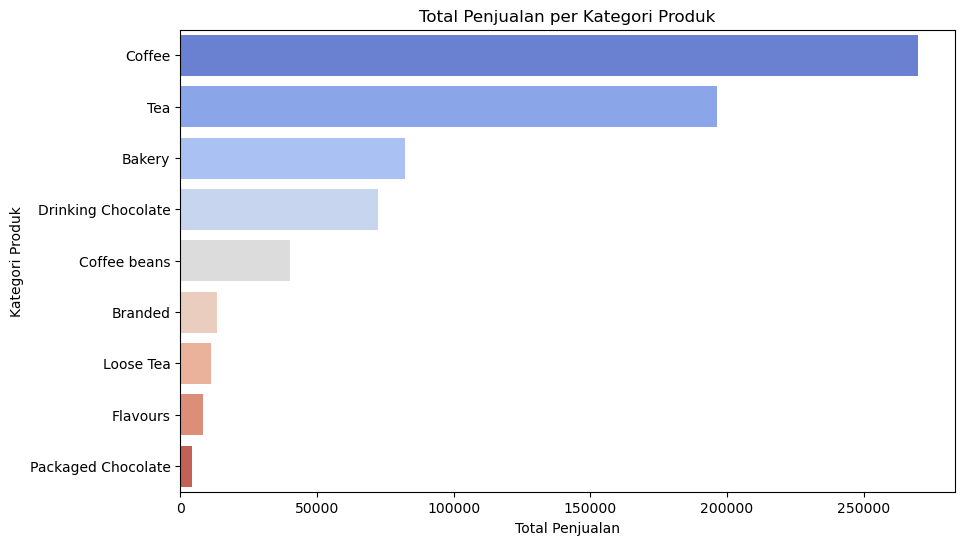

In [11]:
category_sales = df.groupby('product_category')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x='sales', y='product_category', palette='coolwarm')
plt.title('Total Penjualan per Kategori Produk')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()


### Total Penjualan Berdasarkan Kategori Produk

#### Interpretasi:

- **Coffee** adalah kategori dengan penjualan tertinggi, **mendekati \$270.000**, menjadikannya produk utama dan tulang punggung bisnis.
- **Tea** berada di posisi kedua dengan penjualan di atas **\$200.000**, menunjukkan permintaan kuat meskipun sedikit di bawah kopi.
- Kategori **Bakery** dan **Drinking Chocolate** juga menunjukkan kontribusi yang signifikan, namun jauh di bawah kopi dan teh.
- Kategori seperti **Flavours**, **Packaged Chocolate**, dan **Loose Tea** mencatatkan penjualan yang sangat kecil, di bawah **\$10.000**.

#### Kesimpulan:

- Fokus utama penjualan berada pada **Coffee dan Tea**, dengan kontribusi yang dominan terhadap total pendapatan.
- Kategori dengan penjualan rendah perlu dievaluasi untuk:
  - Efisiensi stok dan logistik
  - Kemungkinan bundling atau promosi
  - Pertimbangan eliminasi dari katalog (jika tidak memberikan margin signifikan)

>  Insight: Strategi bisnis dan promosi sebaiknya diarahkan ke kategori **Coffee dan Tea**, sementara kategori minor bisa digunakan sebagai **pelengkap** atau bagian dari bundling paket.


### Top 10 Produk Terlaris

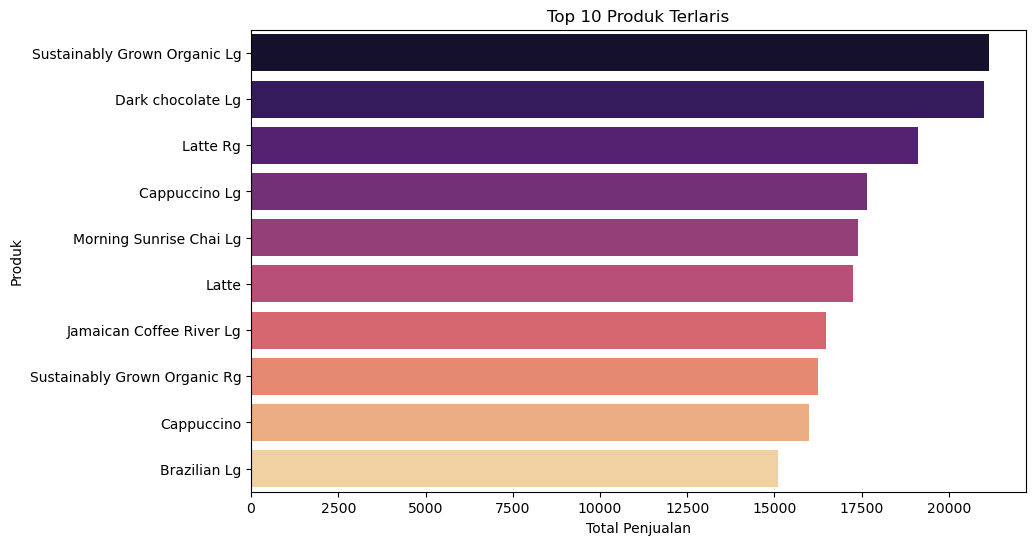

In [ ]:
top_products = df.groupby('product_detail')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='sales', y='product_detail', palette='magma')
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Total Penjualan')
plt.ylabel('Produk')
plt.show()

### Top 10 Produk Terlaris

Visualisasi di atas menunjukkan **10 produk dengan total penjualan tertinggi** berdasarkan agregasi nilai `sales`.

#### Interpretasi:

- **Produk dengan penjualan tertinggi** adalah:
  1. **Sustainably Grown Organic (Large)**
  2. **Dark Chocolate (Large)**
  3. **Latte (Regular)**
  4. **Cappuccino (Large)**
  5. **Morning Sunrise Chai (Large)**

- Produk-produk ini umumnya merupakan **minuman berukuran besar** (`Lg`) dan termasuk dalam kategori kopi spesial, cokelat, dan teh.

- Baik varian reguler maupun besar dari produk-produk seperti **Latte**, **Cappuccino**, dan **Organic Coffee** tampil kuat di daftar ini, menunjukkan **konsistensi permintaan** untuk jenis produk tersebut.

#### Kesimpulan:

- Pelanggan sangat menyukai **produk premium dan ukuran besar**, terutama varian kopi organik, cokelat, dan latte.
- Produk seperti **Jamaican Coffee River** dan **Brazilian Lg** juga menunjukkan performa baik, mengindikasikan bahwa **produk berkonsep asal daerah (origin-based)** juga diminati.

>  Insight: Fokus pemasaran, stok, dan bundle promosi dapat diarahkan ke produk-produk dalam daftar ini untuk meningkatkan penjualan lebih lanjut.

#### Rekomendasi:

- Tampilkan produk ini sebagai **"rekomendasi utama"** di etalase toko maupun platform online.
- Gunakan data ini untuk membuat **combo bundling**, misalnya: beli Sustainably Grown Organic + snack = diskon.
- Pertahankan dan pastikan **ketersediaan stok** dari semua item dalam daftar terlaris ini.


### Distribution of Transaction Values

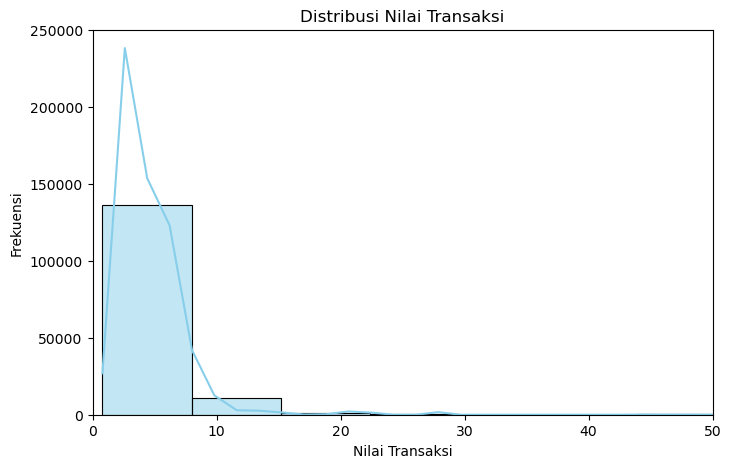

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=50, color='skyblue', kde=True)
plt.title('Distribusi Nilai Transaksi')
plt.xlabel('Nilai Transaksi')
plt.ylabel('Frekuensi')
plt.xlim(0, 50)  # Membatasi agar distribusi transaksi kecil terlihat jelas
plt.show()


### Distribusi Nilai Transaksi

Visualisasi di atas menunjukkan **histogram** dari distribusi nilai transaksi (`sales`) yang terjadi di toko, dengan batas maksimum sumbu-x dibatasi hingga 50 untuk fokus pada transaksi kecil-menengah.

#### Interpretasi:

- Sebagian besar transaksi berada di rentang **0 hingga 10**.
- Distribusi sangat **right-skewed** (condong ke kanan), yang berarti:
  - Banyak transaksi memiliki nilai kecil.
  - Hanya sedikit transaksi yang bernilai besar.
- Kurva KDE (kernel density estimation) juga memperlihatkan bahwa puncak distribusi ada di nilai **sangat rendah**, mendekati 0.

#### Kesimpulan:

- Mayoritas pembelian pelanggan adalah dalam skala **transaksi kecil atau individual**.
- Nilai transaksi besar (di atas 20) **sangat jarang terjadi**, kemungkinan hanya pada pembelian dalam jumlah besar atau bundling produk tertentu.
- Analisis dan strategi bisnis sebaiknya fokus pada peningkatan nilai transaksi kecil (misalnya dengan upselling atau combo/paket penjualan).

>  Insight: Strategi seperti **minimum belanja untuk promo**, atau **diskon pembelian lebih dari satu item**, dapat membantu mendorong nilai transaksi rata-rata.


### Total Penjualan per Lokasi Toko

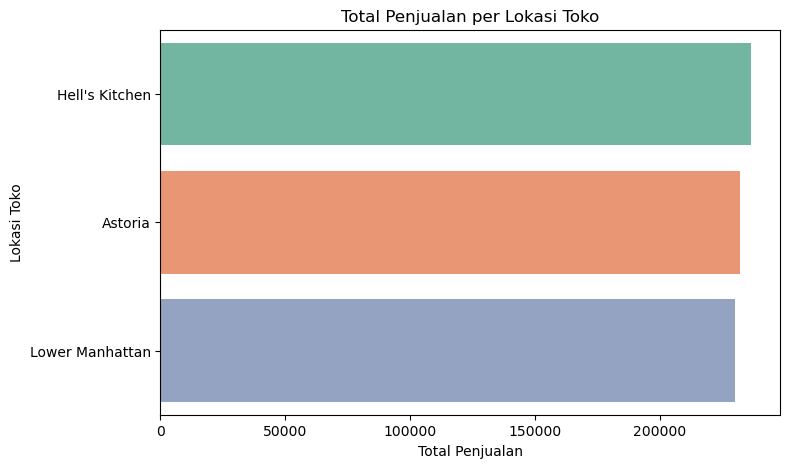

In [ ]:
store_sales = df.groupby('store_location')['sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=store_sales, x='sales', y='store_location', palette='Set2')
plt.title('Total Penjualan per Lokasi Toko')
plt.xlabel('Total Penjualan')
plt.ylabel('Lokasi Toko')
plt.show()


### Total Penjualan per Lokasi Toko

Visualisasi di atas menunjukkan total penjualan (dalam satuan rupiah/dollar) dari masing-masing toko di tiga lokasi berbeda:

- **Hell's Kitchen**
- **Astoria**
- **Lower Manhattan**

#### Interpretasi:

- **Hell's Kitchen** menjadi lokasi dengan penjualan tertinggi di antara ketiga cabang.
- **Astoria** berada di posisi kedua, dengan jumlah penjualan yang sangat mendekati Hell's Kitchen.
- **Lower Manhattan** sedikit di bawah dua lokasi lainnya, namun tetap memiliki performa penjualan yang kuat.

> Secara umum, ketiga lokasi memiliki performa yang **cukup seimbang**, menunjukkan bahwa tidak ada lokasi yang benar-benar dominan atau tertinggal jauh.

#### Kesimpulan:

- Tidak ada toko yang secara signifikan outperform atau underperform, tetapi Hell's Kitchen dapat dipelajari lebih lanjut untuk mencari tahu faktor kesuksesannya.
- Strategi yang berhasil di Hell's Kitchen **bisa direplikasi** ke lokasi lain, misalnya dari segi produk unggulan, jam operasional, atau promo.
- Perlu dilakukan analisis lanjutan per kategori produk atau waktu transaksi untuk mengetahui **kontribusi spesifik** terhadap penjualan di tiap toko.



### Analisis Outlier

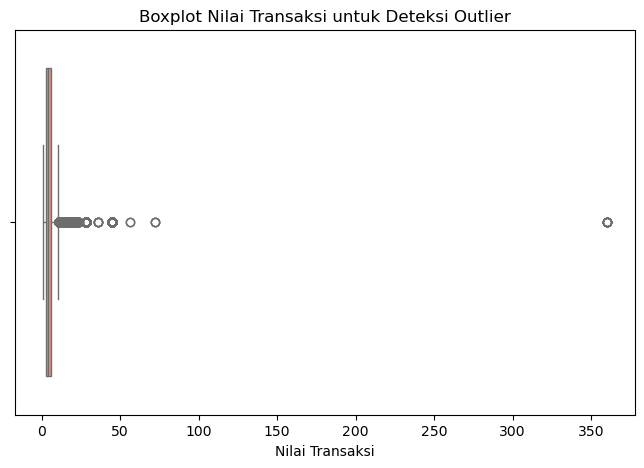

In [ ]:
# Outlier Analysis using Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sales'], color='salmon')
plt.title('Boxplot Nilai Transaksi untuk Deteksi Outlier')
plt.xlabel('Nilai Transaksi')
plt.show()

### Analisis Outlier: Nilai Transaksi (Sales)

Visualisasi di atas menggunakan **boxplot** untuk mendeteksi outlier pada variabel `sales` (nilai transaksi per baris data).

#### Interpretasi:

- Sebagian besar nilai transaksi berada di **rentang rendah**, yaitu sekitar **di bawah \$50**.
- Terdapat beberapa **outlier** (nilai ekstrem) yang terdeteksi jauh dari kelompok utama.
- Beberapa titik outlier bahkan berada di atas **\$100**, dan satu titik **mencapai lebih dari \$350**.

#### Apa Artinya?

- **Distribusi nilai transaksi sangat condong ke kiri (right-skewed)**, di mana sebagian besar transaksi bernilai kecil.
- **Outlier ini bisa jadi pembelian dalam jumlah besar**, pembelian combo, atau mungkin kesalahan input.
- Jika analisis fokus pada pola umum pembelian konsumen harian, **outlier bisa dipertimbangkan untuk diatasi** (misalnya dihapus atau di-trim).

#### Kesimpulan:

- Mayoritas transaksi bernilai rendah, menunjukkan **pembelian sederhana** oleh pelanggan.
- Beberapa transaksi bernilai sangat tinggi terdeteksi sebagai **outlier**, yang perlu dipertimbangkan dalam analisis lanjutan, seperti saat menghitung rata-rata agar tidak bias.

>  Saran: Gunakan **median** atau **IQR-based summary** untuk analisis deskriptif nilai transaksi agar tidak terpengaruh oleh outlier.


In [ ]:
# Menampilkan transaksi di atas kuartil ke-99 untuk investigasi
q99 = df['sales'].quantile(0.99)
outliers = df[df['sales'] > q99]
print(f"Jumlah outlier di atas persentil 99: {outliers.shape[0]}")
print(outliers[['transaction_date', 'store_location', 'product_detail', 'sales']].head())

Jumlah outlier di atas persentil 99: 1158
     transaction_date   store_location         product_detail  sales
3293       2023-01-07  Lower Manhattan               Ethiopia  21.00
3296       2023-01-07  Lower Manhattan    Organic Decaf Blend  28.00
3302       2023-01-07  Lower Manhattan    Organic Decaf Blend  28.00
3408       2023-01-07  Lower Manhattan    Organic Decaf Blend  28.00
3447       2023-01-07  Lower Manhattan  Jamacian Coffee River  19.75


### Analisis Korelasi Heatmap

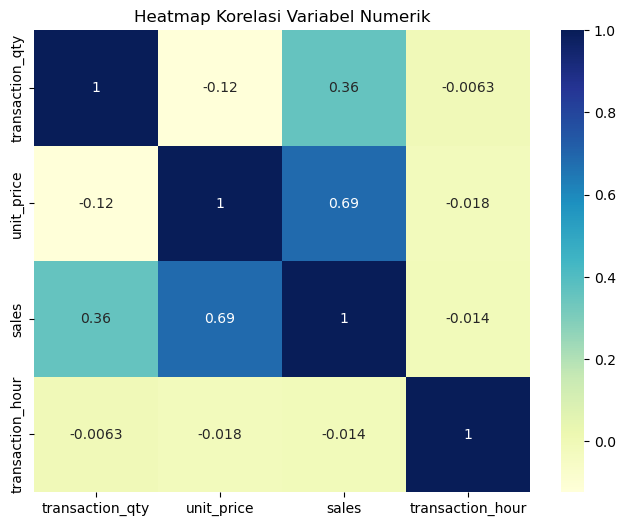

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(8,6))
corr = df[['transaction_qty', 'unit_price', 'sales', 'transaction_hour']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

### Analisis Korelasi Variabel Numerik

Heatmap di atas menunjukkan **hubungan korelasi** antar variabel numerik utama dalam dataset, yaitu:

- `transaction_qty` (jumlah transaksi)
- `unit_price` (harga per unit)
- `sales` (total penjualan)
- `transaction_hour` (jam transaksi)

#### Interpretasi:

- **`sales` vs `unit_price`:** Memiliki korelasi positif kuat sebesar **0.69**  
   Artinya, semakin tinggi harga satuan produk, semakin besar nilai penjualannya (logis, karena total sales = qty × unit price).

- **`sales` vs `transaction_qty`:** Memiliki korelasi positif sedang sebesar **0.36**  
   Menunjukkan bahwa peningkatan jumlah item yang dibeli turut mendorong naiknya total penjualan.

- **`transaction_qty` vs `unit_price`:** Korelasi negatif lemah sebesar **-0.12**  
   Menunjukkan bahwa pembelian dalam jumlah banyak cenderung dilakukan pada produk dengan harga satuan yang lebih rendah.

- **`transaction_hour` terhadap semua variabel lainnya:** Hampir tidak memiliki korelasi signifikan (semua mendekati **0**)  
   Waktu transaksi tidak terlalu memengaruhi jumlah pembelian, harga satuan, maupun total penjualan.

#### Kesimpulan:

- Penjualan (`sales`) sangat dipengaruhi oleh **harga per unit** dan cukup dipengaruhi oleh **kuantitas transaksi**.
- **Waktu transaksi (jam)** tidak memiliki hubungan signifikan dengan variabel lainnya, sehingga tidak menjadi faktor utama dalam mendorong penjualan.


## **Kesimpulan**

### Temuan Utama

**1. Pertumbuhan Penjualan Bulanan (Jan–Jun 2023):**

| Bulan      | Total Penjualan   |
|------------|------------------:|
| Januari    | Rp81,677.74       |
| Februari   | Rp76,145.19       |
| Maret      | Rp98,834.68       |
| April      | Rp118,941.08      |
| Mei        | Rp156,727.76      |
| Juni       | Rp166,485.88      |

> **Penjualan meningkat dua kali lipat** dalam enam bulan — menunjukkan pertumbuhan musiman yang kuat atau kampanye promosi yang sukses.

---

**2. Kategori Produk Teratas Berdasarkan Pendapatan:**

| Kategori Produk       | Total Penjualan   |
|-----------------------|------------------:|
| Kopi                  | Rp269,952.45      |
| Teh                   | Rp196,405.95      |
| Roti & Bakery         | Rp82,315.64       |
| Cokelat Minum         | Rp72,416.00       |
| Biji Kopi             | Rp40,085.25       |

> Penjualan didominasi oleh kopi dan teh. Sirup dan cokelat kemasan berkinerja rendah.

---

**3. 5 Produk Terlaris:**

| Produk (Ukuran)                    | Total Penjualan   |
|-----------------------------------|------------------:|
| Kopi Organik Berkelanjutan (Besar)| Rp21,151.75       |
| Cokelat Hitam (Besar)             | Rp21,006.00       |
| Latte (Reguler)                   | Rp19,112.25       |
| Cappuccino (Besar)                | Rp17,641.75       |
| Morning Sunrise Chai (Besar)      | Rp17,384.00       |

> Minuman ukuran besar dan premium menjadi penyumbang pendapatan tertinggi.

---

**4. Penjualan Berdasarkan Lokasi:**

| Lokasi            | Total Penjualan   |
|-------------------|------------------:|
| Hell’s Kitchen    | Rp236.5K          |
| Astoria           | Rp232.2K          |
| Lower Manhattan   | Rp230.1K          |

> Semua toko memiliki performa yang serupa; Hell’s Kitchen sedikit unggul.

---

**5. Insight Perilaku Pelanggan:**
- Puncak penjualan terjadi pukul 08.00–10.00 (jam sibuk pagi).
- Hari kerja (Senin–Jumat) menunjukkan penjualan stabil (~Rp100K); sedikit penurunan di akhir pekan.
- Hanya sekitar 1% transaksi yang melebihi Rp18 — mayoritas pembelian bernilai sedang.

---


## **Rekomendasi Bisnis**

### 1. Optimalkan Campuran Produk
- Fokus pada produk terlaris seperti kopi premium, latte, dan teh spesial.
- Hentikan atau gabungkan produk berkinerja rendah (misalnya sirup, cokelat kemasan).

---

### 2. Promosi Berdasarkan Waktu
- Luncurkan program “Happy Hour Sore” (pukul 14.00–17.00) untuk meningkatkan penjualan di luar jam sibuk.
- Tingkatkan penjualan di hari Jumat atau akhir pekan dengan penawaran kilat atau promo waktu terbatas.

---

### 3. Kampanye Musiman
- Promosikan minuman dingin seperti iced coffee dan teh selama musim panas.
- Manfaatkan pertumbuhan penjualan di bulan Mei–Juni dengan program loyalitas atau promosi bertema musim panas.

---

### 4. Perencanaan Inventaris yang Lebih Cerdas
- Prioritaskan stok untuk produk-produk dengan penjualan tinggi.
- Gunakan tren harian dan berdasarkan kategori untuk menghindari penumpukan stok produk yang kurang laku.

---

### 5. Pemasaran yang Dipersonalisasi
- Gunakan riwayat pembelian pelanggan untuk mengirimkan kupon atau penawaran upgrade yang relevan.
- Sorot produk terlaris di aplikasi dan situs web untuk memudahkan akses.

---

### 6. Strategi Spesifik Toko
- Analisis performa toko di Hell’s Kitchen dan tiru taktik yang berhasil.
- Sesuaikan penawaran berdasarkan lokasi (misalnya lebih banyak produk roti di Astoria jika populer).

---

### 7. Peningkatan UX (Online & Offline)
- Tampilkan kategori teratas dan promosi di halaman utama.
- Tambahkan tombol “pesan ulang favorit” dan banner penawaran terbatas.

---

**Dengan menerapkan strategi-strategi ini, bisnis kedai kopi dapat meningkatkan performa penjualan, lebih selaras dengan preferensi pelanggan, dan memaksimalkan profitabilitas di seluruh kanal retail maupun online.**
